<a href="https://colab.research.google.com/github/snghynn/summ/blob/main/concept_CNN1_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch4. 1 ~ 3

pg. 142 ~ 181 필사

# Ch4. 합성곱 신경망(CNN)
## 4.1 합성곱 신경망

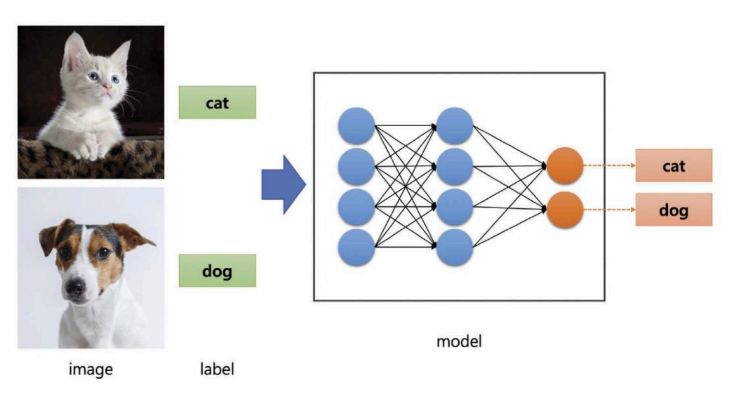

### 1-1 이미지 표현
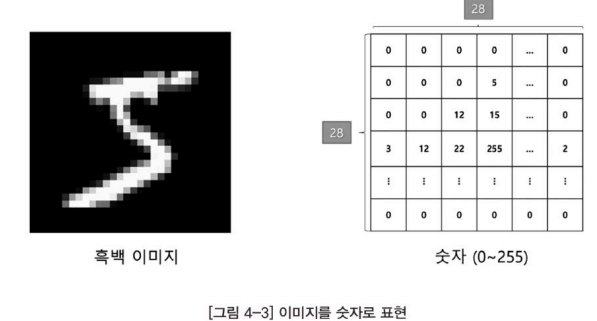

### 1-2 합성곱(Convolution)
- 합성곱 연산: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
- 특성맵: 합성곱 연산을 통해서 추출된 이미지

< 이미지에 필터를 적용하는 합성곱 연산 >


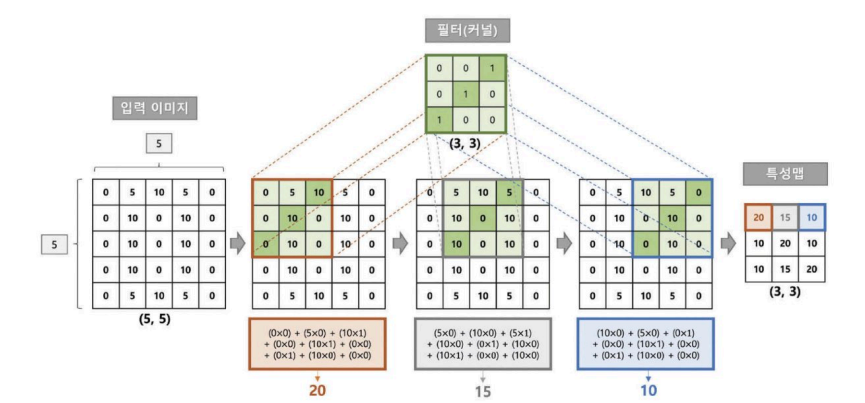


### 1-3 채널(channel)
- 채널: 입력 이미지를 구성하는 2차원 배열의 개수


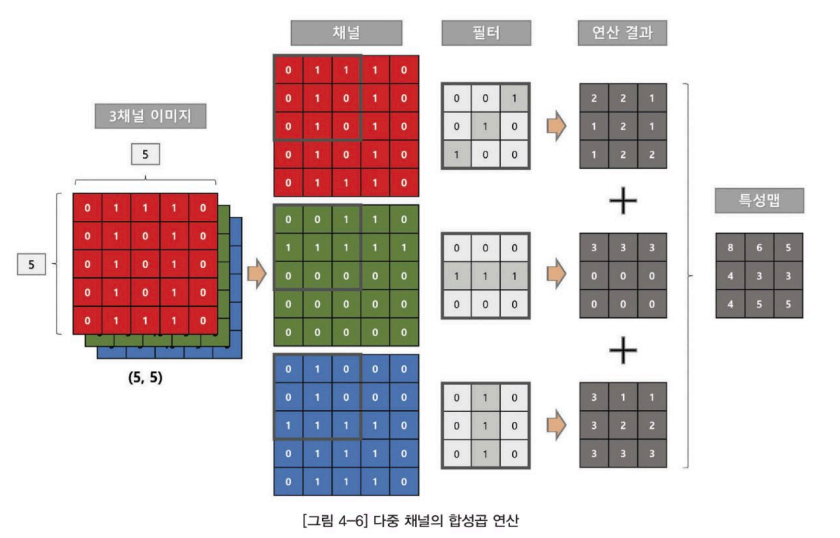


### 1-4 스트라이드(stride)
- 스트라이드: 이미지를 좌측 상단 -> 우측 이동하면서 이동하는 간격



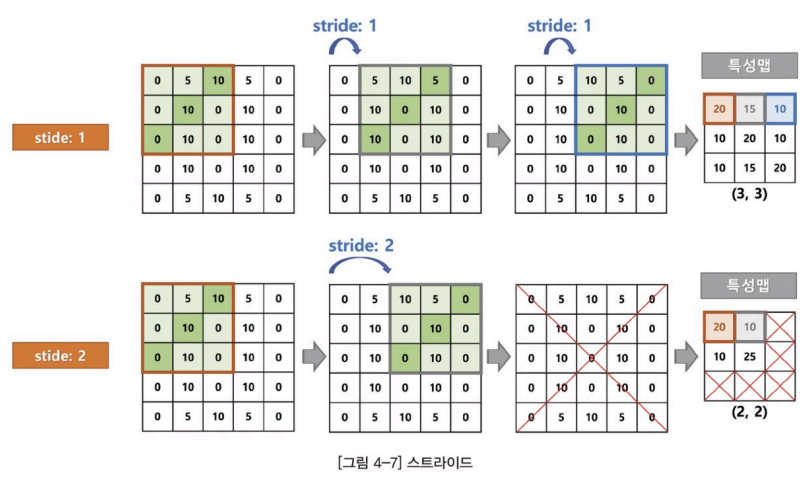


### 1-5 패딩(padding)
- 패딩: 추출된 특성맵의 크기가 입력 이미지 대비 줄어주지 않도록 0으로 채운 후 추출

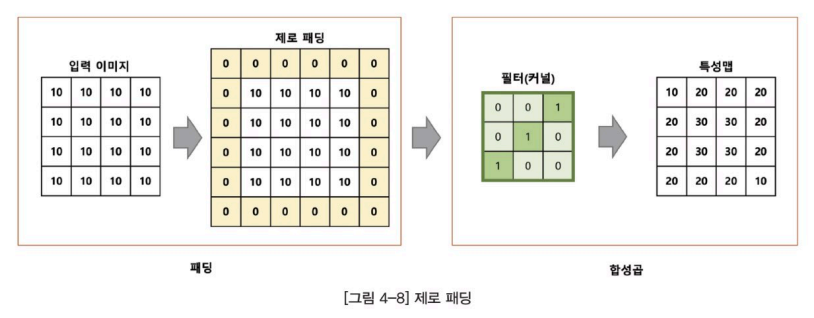

### 1-6 특성맵(feature map) 사이즈

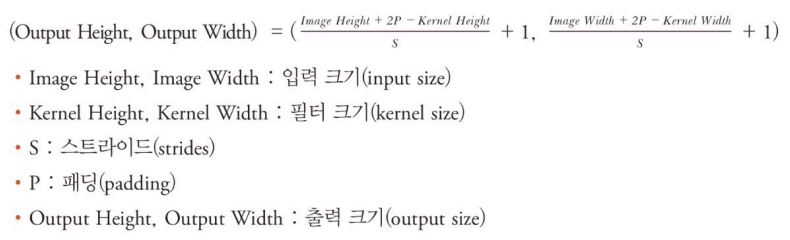

### 1-7 풀링(pooling)
- 풀링 레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 이미지 축소를 통해 연산량 감소
- 과대적합 방지


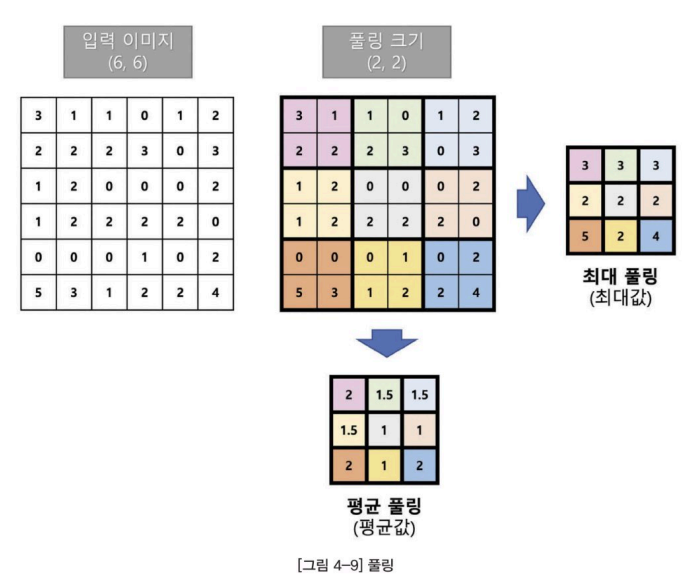

## 4-2 간단한 모델 생성
### 2-1 데이터 로드 및 전처리

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf

In [ ]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


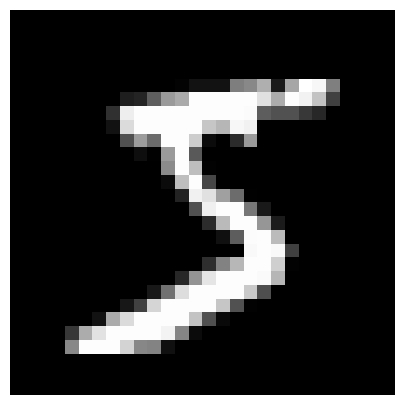

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
#최소값, 최대값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화(Normalization)
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습
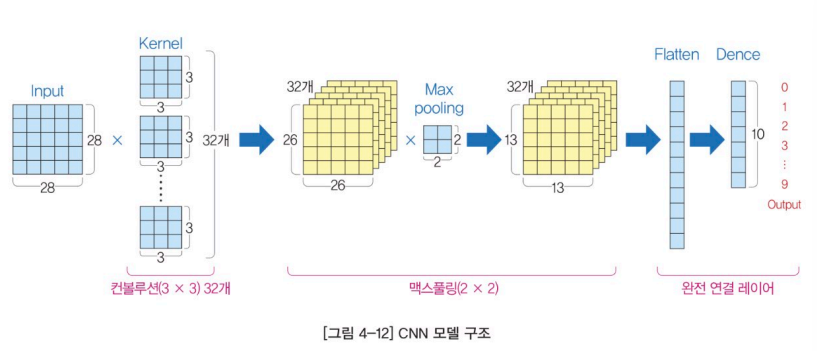

In [ ]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    # max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2128 - accuracy: 0.9401 - val_loss: 0.0893 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 0.0652 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0598 - accuracy: 0.9825 - val_loss: 0.0581 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0575 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0548 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 5ms/step - loss: 0.0599 - accuracy: 0.9830


[0.05989885702729225, 0.9829999804496765]

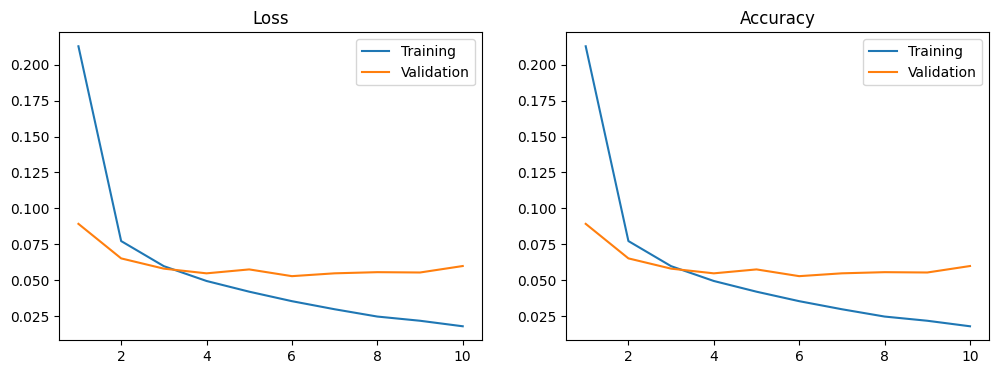

In [ ]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악

- 모델 인스턴스에 summary() 메소드를 적용해주면 모델의 구조를 요약해서 보여줌
- 각 레이어의 이름과 출력 텐서의 형태, 각 레이어를 구성하는 파라미터(가중치) 개수를 알 수 있음

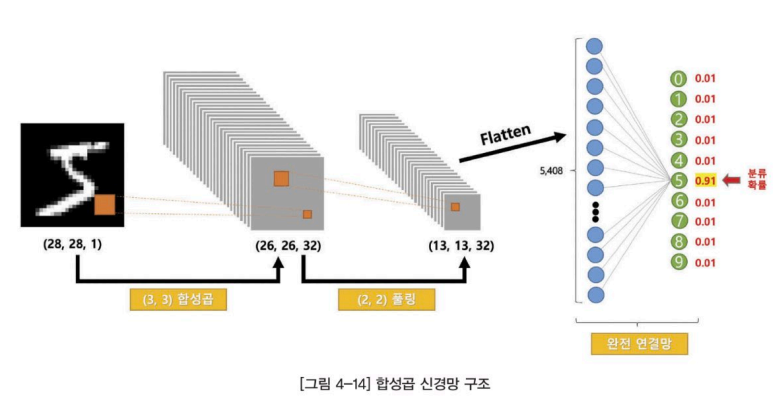

In [ ]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어
model.layers

In [ ]:
# 첫 번째 레이어 선택
model.layers[0]

In [ ]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-4.47145462e-01, -7.09299892e-02, -1.63782692e+00,
           -1.02144098e+00,  9.34431329e-02, -9.19325888e-01,
            1.84366375e-01,  5.58466911e-02, -5.48530407e-02,
            2.36802921e-01,  3.67577046e-01,  1.18607037e-01,
            1.63387164e-01, -3.27932499e-02,  2.54207492e-01,
            1.80535957e-01, -1.46767586e-01,  9.26751256e-01,
           -6.88242912e-01,  2.92254686e-01, -1.76196679e-01,
           -4.58139032e-01,  3.97483140e-01,  2.37613961e-01,
           -8.35892856e-01,  2.43340805e-01, -4.40912455e-01,
            1.24834567e-01,  6.84066787e-02, -6.01587772e-01,
            1.55333385e-01,  1.82046846e-01]],
 
         [[-3.99752170e-01,  2.53627121e-01, -9.20152366e-01,
           -8.68446529e-02,  4.30299968e-01, -7.13180006e-01,
            7.64523521e-02, -5.88732995e-02,  3.41966987e-01,
           -5.27808182e-02,  5.78999519e-01,  1.64112180e-01,
           

In [ ]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-4.47145462e-01, -7.09299892e-02, -1.63782692e+00,
          -1.02144098e+00,  9.34431329e-02, -9.19325888e-01,
           1.84366375e-01,  5.58466911e-02, -5.48530407e-02,
           2.36802921e-01,  3.67577046e-01,  1.18607037e-01,
           1.63387164e-01, -3.27932499e-02,  2.54207492e-01,
           1.80535957e-01, -1.46767586e-01,  9.26751256e-01,
          -6.88242912e-01,  2.92254686e-01, -1.76196679e-01,
          -4.58139032e-01,  3.97483140e-01,  2.37613961e-01,
          -8.35892856e-01,  2.43340805e-01, -4.40912455e-01,
           1.24834567e-01,  6.84066787e-02, -6.01587772e-01,
           1.55333385e-01,  1.82046846e-01]],

        [[-3.99752170e-01,  2.53627121e-01, -9.20152366e-01,
          -8.68446529e-02,  4.30299968e-01, -7.13180006e-01,
           7.64523521e-02, -5.88732995e-02,  3.41966987e-01,
          -5.27808182e-02,  5.78999519e-01,  1.64112180e-01,
          -5.66263080e-01,  

In [ ]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.1647119 , -0.14467561,  0.04850426, -0.07922027, -0.34347686,
       -0.01214321, -0.10208617, -0.21681644, -0.19285327, -0.2220359 ,
       -0.01688582, -0.07761173, -0.07656292, -0.02641879, -0.35190505,
       -0.22903673, -0.2535845 ,  0.13214819, -0.00555922, -0.31101096,
       -0.11246046, -0.2187935 , -0.40550596, -0.02713046,  0.14903918,
       -0.14346321, -0.06598727, -0.20159018, -0.08715986, -0.11198131,
       -0.18440363, -0.02179336], dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 87ms/step


2

In [ ]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

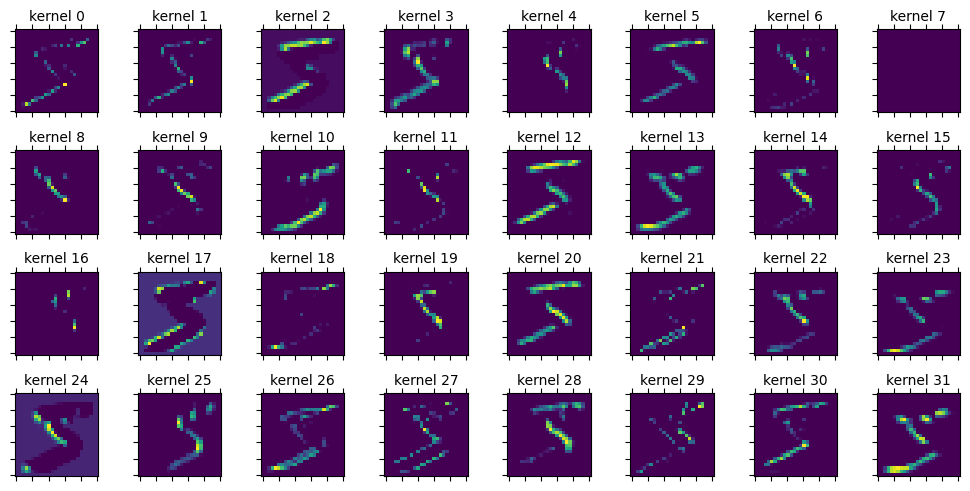

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


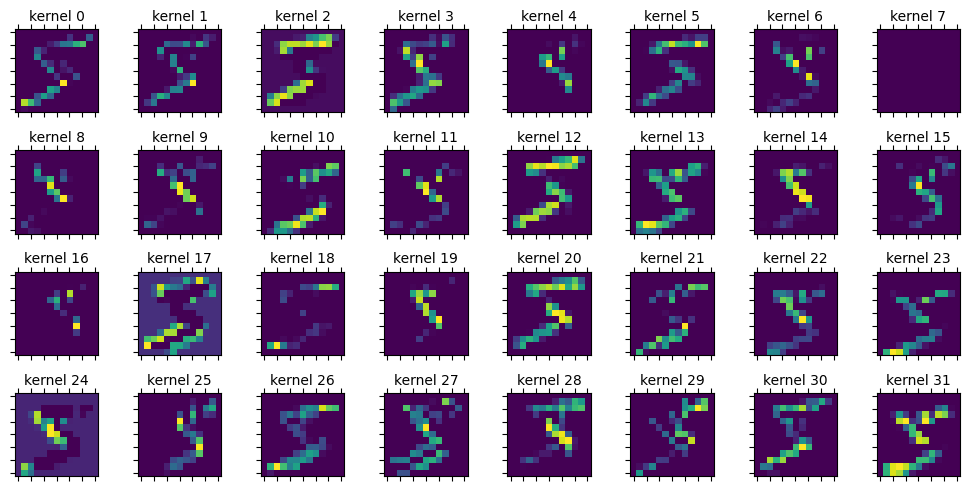

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 4.3 복잡한 모델 생성
### 3-1 데이터셋 준비


In [ ]:
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_vaild) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


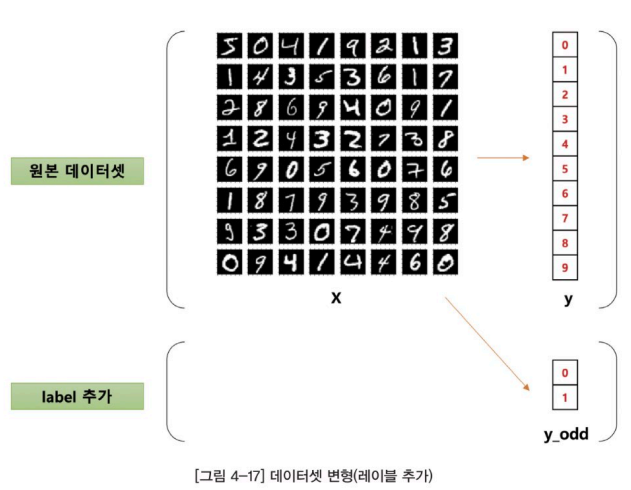

In [ ]:
# 새로운 출력 값 배열 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
# 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
# 정규화(Noramalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성



In [ ]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

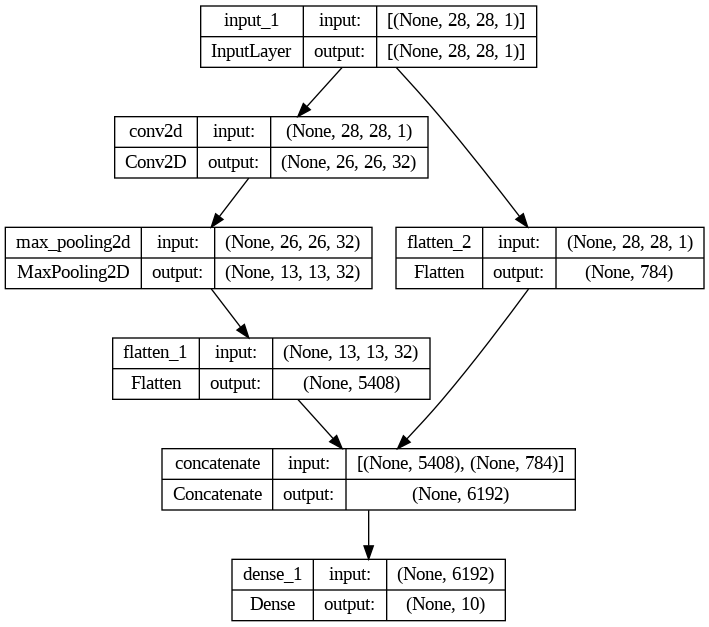

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2056 - accuracy: 0.9418 - val_loss: 0.0874 - val_accuracy: 0.9734
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0802 - accuracy: 0.9768 - val_loss: 0.0693 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.0641 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0590 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0539 -

### 3-3 다중 출력 분류 모델

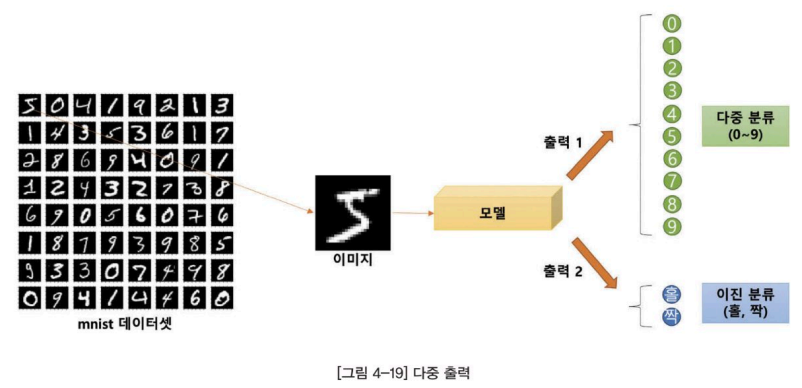

In [ ]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


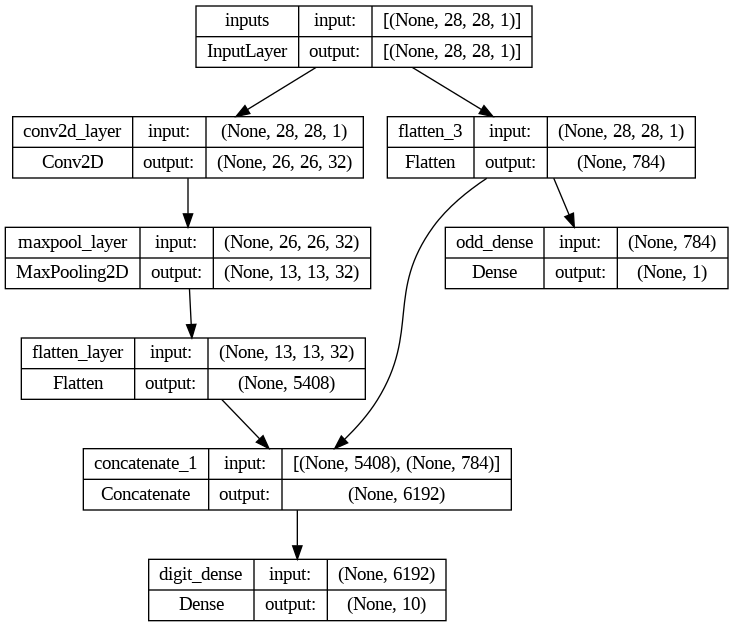

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3620 - digit_dense_loss: 0.2021 - odd_dense_loss: 0.3198 - digit_dense_accuracy: 0.9423 - odd_dense_accuracy: 0.8676 - val_loss: 0.2374 - val_digit_dense_loss: 0.0990 - val_odd_dense_loss: 0.2768 - val_digit_dense_accuracy: 0.9693 - val_odd_dense_accuracy: 0.8902
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2106 - digit_dense_loss: 0.0751 - odd_dense_loss: 0.2709 - digit_dense_accuracy: 0.9786 - odd_dense_accuracy: 0.8922 - val_loss: 0.1951 - val_digit_dense_loss: 0.0633 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9792 - val_odd_dense_accuracy: 0.8963
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1883 - digit_dense_loss: 0.0570 - odd_dense_loss: 0.2625 - digit_dense_accuracy: 0.9832 - odd_dense_accuracy: 0.8956 - val_loss: 0.1895 - val_digit_dense_loss: 0.0581 - val_odd_dense_loss: 0.2628 - val_digit_dense_accuracy: 0.9806 -

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 5ms/step - loss: 0.1880 - digit_dense_loss: 0.0591 - odd_dense_loss: 0.2578 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.9028


[0.18802042305469513,
 0.05913452059030533,
 0.257771760225296,
 0.9825000166893005,
 0.9028000235557556]

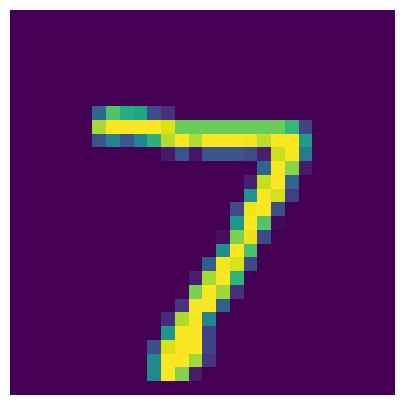

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 5ms/step
[1.54372847e-12 5.57494016e-11 1.22360477e-09 1.24360361e-06
 1.37213105e-11 1.29346729e-12 3.31301086e-19 9.99998748e-01
 7.33158112e-09 2.50888843e-09]
[0.9994934]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-44-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4 전이 학습(Transfer Learning)

- 전이 학습: 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념
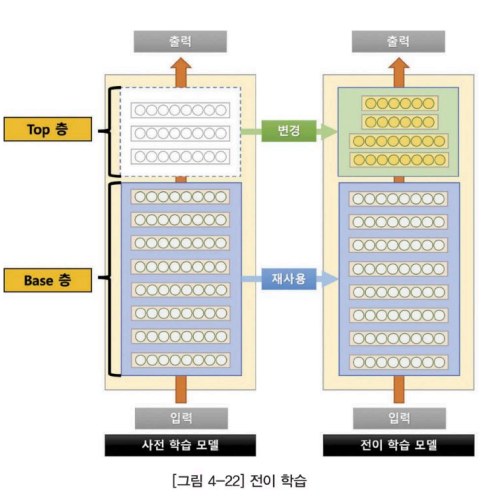

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


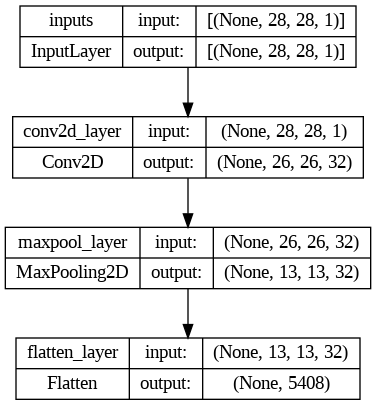

In [ ]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
    ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


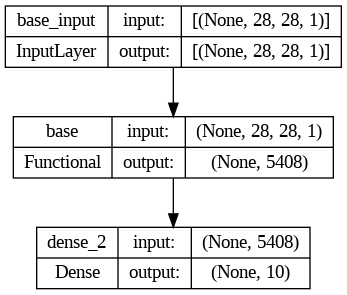

In [ ]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0637 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0667 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0750 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0706 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0797 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0669 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0706 - val_

In [ ]:
# 베이스 모델의 가중치 고정 (Freeze Model)
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)